ΑΣΚΗΣΗ 1

In [1]:
import numpy as np

# Φυσικές σταθερές
q = 1.602e-19       # C
m_e = 9.109e-31     # kg
B = 0.16            # T (1600 G)

# Αποστάσεις καναλιών (mm → m)
R_mm = np.array([8.1, 10.2, 12.2, 14.1, 16.1, 17.9, 19.7, 21.5])
R = R_mm * 1e-3     # m

# E = q^2 B^2 R^2 / (2 m)
E_J = (q**2 * B**2 * R**2) / (2 * m_e)     # ενέργεια σε Joule
E_eV = E_J / q
E_keV = E_eV / 1e3

for i, E in enumerate(E_keV, start=1):
    print(f"Κανάλι {i}: Ē ≈ {E:7.1f} keV")


Κανάλι 1: Ē ≈   147.7 keV
Κανάλι 2: Ē ≈   234.2 keV
Κανάλι 3: Ē ≈   335.1 keV
Κανάλι 4: Ē ≈   447.5 keV
Κανάλι 5: Ē ≈   583.5 keV
Κανάλι 6: Ē ≈   721.3 keV
Κανάλι 7: Ē ≈   873.6 keV
Κανάλι 8: Ē ≈  1040.6 keV


In [2]:
# Όρια σε R (m)
R_mid = (R[:-1] + R[1:]) / 2           # ενδιάμεσα
R0 = R[0] - (R_mid[0] - R[0])          # πριν το 1ο
R_last = R[-1] + (R[-1] - R_mid[-1])   # μετά το 8ο
R_edges = np.concatenate([[R0], R_mid, [R_last]])

# Ενέργεια στα όρια
E_edges_J = (q**2 * B**2 * R_edges**2) / (2 * m_e)
E_edges_keV = (E_edges_J / q) / 1e3

# Ενεργειακό εύρος κάθε καναλιού
dE_keV = np.diff(E_edges_keV)

for i, dE in enumerate(dE_keV, start=1):
    print(f"Κανάλι {i}: ΔE ≈ {dE:6.1f} keV")


Κανάλι 1: ΔE ≈   76.6 keV
Κανάλι 2: ΔE ≈   93.9 keV
Κανάλι 3: ΔE ≈  106.9 keV
Κανάλι 4: ΔE ≈  124.0 keV
Κανάλι 5: ΔE ≈  137.3 keV
Κανάλι 6: ΔE ≈  145.1 keV
Κανάλι 7: ΔE ≈  159.7 keV
Κανάλι 8: ΔE ≈  174.2 keV


In [3]:
CR = np.array([5607, 2461, 1932, 1347,  906,  721,  523,  398], dtype=float)
dE_tab = np.array([72, 90, 106, 120, 132, 144, 150, 162], dtype=float)  # από εκφώνηση/μέρος (β)
G  = np.array([0.281, 0.328, 0.342, 0.343, 0.332, 0.316, 0.303, 0.287], dtype=float)

phi = CR / (G * dE_tab)   # διαφορική ροή

for i, ph in enumerate(phi, start=1):
    print(f"Κανάλι {i}: Φ ≈ {ph:8.3f} s⁻¹ cm⁻² sr⁻¹ keV⁻¹")


Κανάλι 1: Φ ≈  277.135 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 2: Φ ≈   83.367 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 3: Φ ≈   53.294 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 4: Φ ≈   32.726 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 5: Φ ≈   20.674 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 6: Φ ≈   15.845 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 7: Φ ≈   11.507 s⁻¹ cm⁻² sr⁻¹ keV⁻¹
Κανάλι 8: Φ ≈    8.560 s⁻¹ cm⁻² sr⁻¹ keV⁻¹


ΑΣΚΗΣΗ 2

In [4]:
!pip install scipy matplotlib

In [5]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [6]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from datetime import datetime, timedelta

# =========================
# 1. Φόρτωση δεδομένων Dst & AL
# =========================

data = sio.loadmat("Indices.mat")

T   = data["T"].flatten()    # χρόνος σε datenum (MATLAB-like)
DST = data["DST"].flatten()  # δείκτης Dst (nT)
AL  = data["AL"].flatten()   # δείκτης AL (nT)

# Βήμα χρόνου σε ώρες (έλεγχος ότι είναι ~5 min)
dt_days  = np.median(np.diff(T))
dt_hours = dt_days * 24
print(f"Βήμα δείγματος: {dt_hours:.3f} ώρες (~{dt_hours*60:.1f} λεπτά)")

Βήμα δείγματος: 0.083 ώρες (~5.0 λεπτά)


Βήμα δείγματος: 0.083 ώρες (~5.0 λεπτά)
Χρονικό διάστημα δεδομένων:
Αρχή: 2013-03-01 00:00:00
Τέλος: 2013-04-01 23:54:59.999998


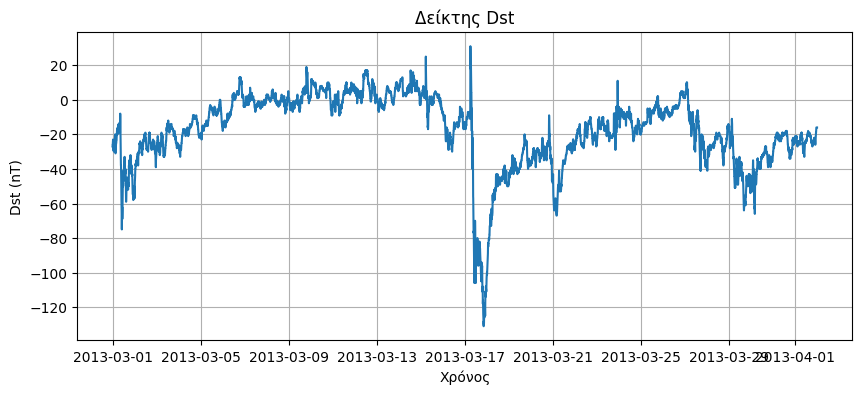

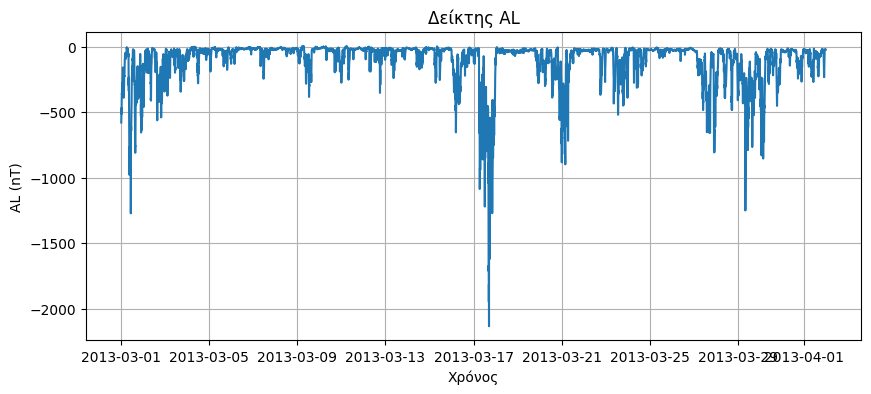

Υποψήφιες καταιγίδες (Dst < -50 nT): 16
Συνολικά επεισόδια καταιγίδων (ομαδοποιημένα): 4

Δύο ισχυρότερες καταιγίδες:
Καταιγίδα 1: Dst_min = -106 nT,  T = 735310.4340277778,  datetime = 2013-03-17 10:24:59.999998
Καταιγίδα 2: Dst_min = -75 nT,  T = 735294.4236111111,  datetime = 2013-03-01 10:10:00.000001


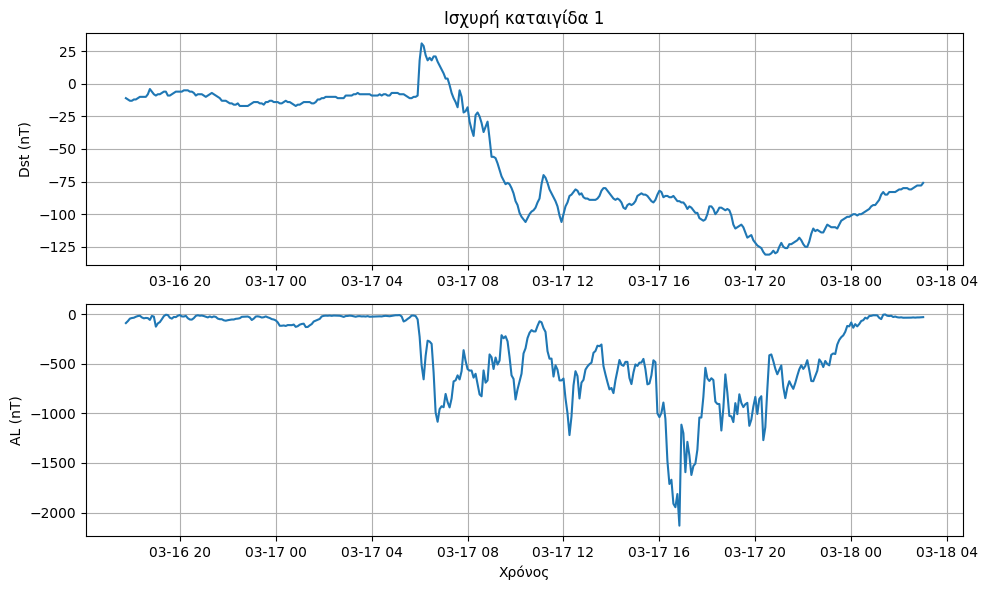

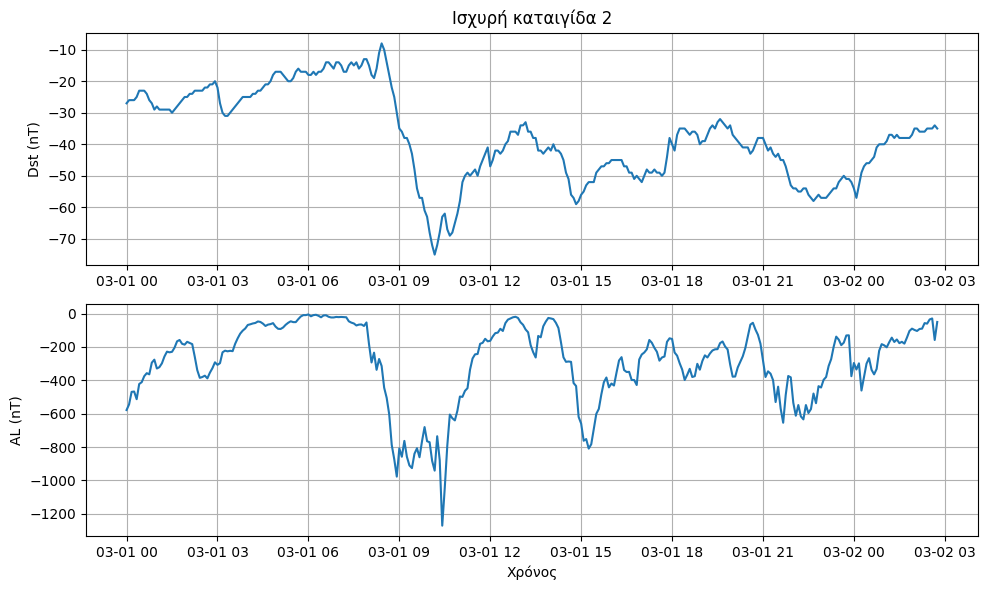


Καταιγίδα 1 – Φάσεις:
{'t_start_dn': np.float64(735294.0), 't_min_dn': np.float64(735310.4340277778), 't_end_dn': np.float64(735313.8194444445), 't_start': datetime.datetime(2013, 3, 1, 0, 0), 't_min': datetime.datetime(2013, 3, 17, 10, 24, 59, 999998), 't_end': datetime.datetime(2013, 3, 20, 19, 40, 0, 4), 'main_h': np.float64(394.4166666660458), 'rec_h': np.float64(81.25000000186265), 'tot_h': np.float64(475.66666666790843), 'main_days': np.float64(16.434027777751908), 'rec_days': np.float64(3.385416666744277), 'tot_days': np.float64(19.819444444496185)}

Καταιγίδα 2 – Φάσεις:
{'t_start_dn': np.float64(735294.0), 't_min_dn': np.float64(735294.4236111111), 't_end_dn': np.float64(735295.4930555555), 't_start': datetime.datetime(2013, 3, 1, 0, 0), 't_min': datetime.datetime(2013, 3, 1, 10, 10, 0, 1), 't_end': datetime.datetime(2013, 3, 2, 11, 49, 59, 999996), 'main_h': np.float64(10.166666666977108), 'rec_h': np.float64(25.666666665114462), 'tot_h': np.float64(35.83333333209157), 'main

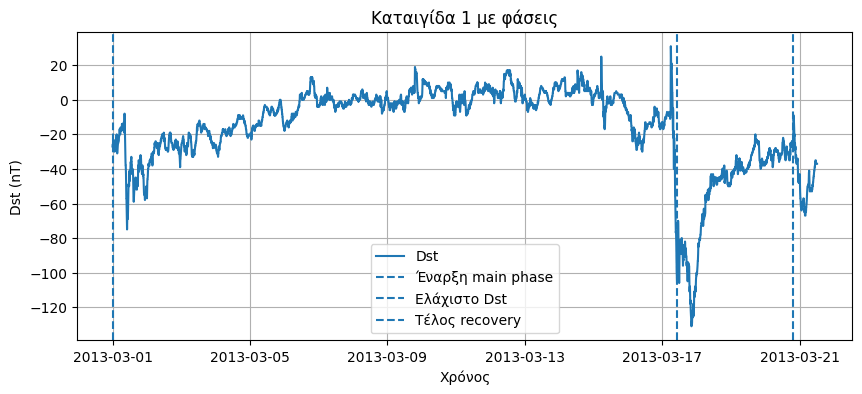

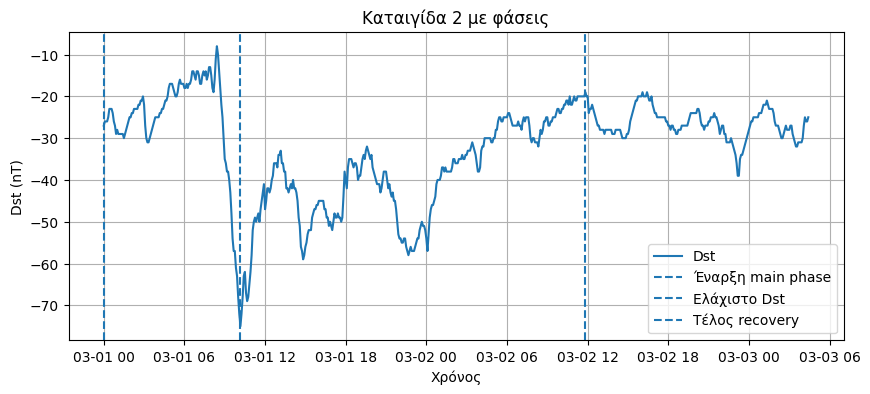

In [14]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from datetime import datetime, timedelta

# =========================
# 1. Φόρτωση δεδομένων Dst & AL
# =========================

data = sio.loadmat("Indices.mat")

T   = data["T"].flatten()    # χρόνος σε datenum (MATLAB-like)
DST = data["DST"].flatten()  # δείκτης Dst (nT)
AL  = data["AL"].flatten()   # δείκτης AL (nT)

# Βήμα χρόνου σε ώρες (έλεγχος ότι είναι ~5 min)
dt_days  = np.median(np.diff(T))
dt_hours = dt_days * 24
print(f"Βήμα δείγματος: {dt_hours:.3f} ώρες (~{dt_hours*60:.1f} λεπτά)")

# =========================
# 2. Μετατροπή datenum -> datetime για σωστό άξονα χρόνου
# =========================

def matlab_datenum_to_datetime(dn):
    """
    Μετατροπή MATLAB datenum σε Python datetime.
    MATLAB dn: μέρες από 0000-01-00
    """
    # standard μετατροπή
    return datetime.fromordinal(int(dn)) + timedelta(days=dn % 1) - timedelta(days=366)

time = np.array([matlab_datenum_to_datetime(t) for t in T])

print("Χρονικό διάστημα δεδομένων:")
print("Αρχή:", time[0])
print("Τέλος:", time[-1])

# =========================
# 3. (α) Γραφικές παραστάσεις Dst και AL
# =========================

plt.figure(figsize=(10, 4))
plt.plot(time, DST)
plt.title("Δείκτης Dst")
plt.xlabel("Χρόνος")
plt.ylabel("Dst (nT)")
plt.grid(True)

plt.figure(figsize=(10, 4))
plt.plot(time, AL)
plt.title("Δείκτης AL")
plt.xlabel("Χρόνος")
plt.ylabel("AL (nT)")
plt.grid(True)

plt.show()

# =========================
# 4. (β) Εντοπισμός γεωμαγνητικών καταιγίδων
# =========================

# Τοπικά ελάχιστα του Dst
mins = argrelextrema(DST, np.less, order=6)[0]

# Υποψήφιες καταιγίδες: Dst < -50 nT
storm_candidates = mins[DST[mins] < -50]
print("Υποψήφιες καταιγίδες (Dst < -50 nT):", len(storm_candidates))

# --- Ομαδοποίηση: σημεία που απέχουν < 6 ώρες ανήκουν στην ίδια καταιγίδα
groups = []
if len(storm_candidates) > 0:
    current_group = [storm_candidates[0]]
    for idx in storm_candidates[1:]:
        dt_h = (T[idx] - T[current_group[-1]]) * 24
        if dt_h < 6:  # ίδια καταιγίδα
            current_group.append(idx)
        else:
            groups.append(current_group)
            current_group = [idx]
    groups.append(current_group)

print("Συνολικά επεισόδια καταιγίδων (ομαδοποιημένα):", len(groups))

# Για κάθε καταιγίδα κρατάμε το βαθύτερο minimum
storm_min_indices = [min(g, key=lambda i: DST[i]) for g in groups]

# Διαλέγουμε τις 2 ισχυρότερες (πιο αρνητικό Dst)
storm_min_indices = np.array(storm_min_indices)
two_strongest = storm_min_indices[np.argsort(DST[storm_min_indices])[:2]]

print("\nΔύο ισχυρότερες καταιγίδες:")
for j, idx in enumerate(two_strongest, start=1):
    print(f"Καταιγίδα {j}: Dst_min = {DST[idx]} nT,  T = {T[idx]},  datetime = {time[idx]}")

# =========================
# 5. (γ) Zoom γύρω από τις δύο ισχυρές καταιγίδες
# =========================

def plot_zoom_storm(center_idx, N=200, title=""):
    i1 = max(center_idx - N, 0)
    i2 = min(center_idx + N, len(T))
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time[i1:i2], DST[i1:i2])
    plt.ylabel("Dst (nT)")
    plt.title(title)
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(time[i1:i2], AL[i1:i2])
    plt.ylabel("AL (nT)")
    plt.xlabel("Χρόνος")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_zoom_storm(two_strongest[0], N=200, title="Ισχυρή καταιγίδα 1")
plot_zoom_storm(two_strongest[1], N=200, title="Ισχυρή καταιγίδα 2")

# =========================
# 6. (δ) Εκτίμηση φάσεων (main/recovery)
# =========================

def estimate_phases(i_min, DST, T, threshold_quiet=-20):
    """
    Εκτιμά αρχή main phase, ελάχιστο, τέλος recovery.
    main start: ΠΡΩΤΗ φορά που πέφτει κάτω από threshold_quiet
    recovery end: πρώτη φορά μετά το minimum που ανεβαίνει πάνω από threshold_quiet
    """
    # main phase start
    before = np.where(DST[:i_min] < threshold_quiet)[0]
    if len(before) > 0:
        i_start = before[0]   # όχι το τελευταίο, το πρώτο -> πιο ρεαλιστική main phase
    else:
        i_start = max(i_min - 50, 0)

    # recovery end
    after = np.where(DST[i_min:] > threshold_quiet)[0]
    if len(after) > 0:
        i_end = i_min + after[0]
    else:
        i_end = min(i_min + 200, len(DST) - 1)

    return (i_start, i_min, i_end)

def phase_durations(idx_tuple, T):
    i_start, i_min, i_end = idx_tuple
    t_start, t_min, t_end = T[i_start], T[i_min], T[i_end]
    main_h = (t_min - t_start) * 24
    rec_h  = (t_end - t_min) * 24
    tot_h  = (t_end - t_start) * 24
    return {
        "t_start_dn": t_start,
        "t_min_dn": t_min,
        "t_end_dn": t_end,
        "t_start": matlab_datenum_to_datetime(t_start),
        "t_min": matlab_datenum_to_datetime(t_min),
        "t_end": matlab_datenum_to_datetime(t_end),
        "main_h": main_h,
        "rec_h": rec_h,
        "tot_h": tot_h,
        "main_days": main_h / 24,
        "rec_days": rec_h / 24,
        "tot_days": tot_h / 24,
    }

# Φάσεις για τις δύο καταιγίδες
ph1_idx = estimate_phases(two_strongest[0], DST, T)
ph2_idx = estimate_phases(two_strongest[1], DST, T)

storm1 = phase_durations(ph1_idx, T)
storm2 = phase_durations(ph2_idx, T)

print("\nΚαταιγίδα 1 – Φάσεις:")
print(storm1)
print("\nΚαταιγίδα 2 – Φάσεις:")
print(storm2)

def plot_storm_with_phases(idx_tuple, title=""):
    i_start, i_min, i_end = idx_tuple
    pad = 200
    a = max(i_start - pad, 0)
    b = min(i_end + pad, len(DST))

    plt.figure(figsize=(10, 4))
    plt.plot(time[a:b], DST[a:b], label="Dst")
    plt.axvline(time[i_start], linestyle='--', label="Έναρξη main phase")
    plt.axvline(time[i_min],   linestyle='--', label="Ελάχιστο Dst")
    plt.axvline(time[i_end],   linestyle='--', label="Τέλος recovery")
    plt.title(title)
    plt.xlabel("Χρόνος")
    plt.ylabel("Dst (nT)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_storm_with_phases(ph1_idx, "Καταιγίδα 1 με φάσεις")
plot_storm_with_phases(ph2_idx, "Καταιγίδα 2 με φάσεις")





In [11]:
def matlab_datenum_to_datetime(dn):
    return datetime.fromordinal(int(dn)) + timedelta(days=dn%1) - timedelta(days=366)

print(matlab_datenum_to_datetime(735310.4340))
print(matlab_datenum_to_datetime(735310.4965))


2013-03-17 10:24:57.600001
2013-03-17 11:54:57.600001


In [12]:
from datetime import datetime, timedelta

def matlab_datenum_to_datetime(dn):
    return datetime.fromordinal(int(dn)) + timedelta(days=dn%1) - timedelta(days=366)

storm_times = [735310.4340277778, 735310.4965277778]
for t in storm_times:
    print(t, "→", matlab_datenum_to_datetime(t))


735310.4340277778 → 2013-03-17 10:24:59.999998
735310.4965277778 → 2013-03-17 11:54:59.999998


Διαστάσεις omni: (8640, 8)
      0   1  2  3      4     5      6     7
0  2013  74  0  0  10.12  6.20  360.8  1.27
1  2013  74  0  1  10.10  6.27  360.8  1.30
2  2013  74  0  2  10.00  5.32  361.1  1.52
3  2013  74  0  3  10.00  5.47  356.9  1.42
4  2013  74  0  4  10.09  6.12  356.7  1.41
Διάστημα χρόνου OMNI: 2013-03-15 00:00:00 → 2013-03-20 23:59:00
Επιλεγμένο διάστημα για ανάλυση OMNI: 2013-03-15 00:00:00 → 2013-03-20 00:00:00
Σημεία στο επιλεγμένο διάστημα: 7201


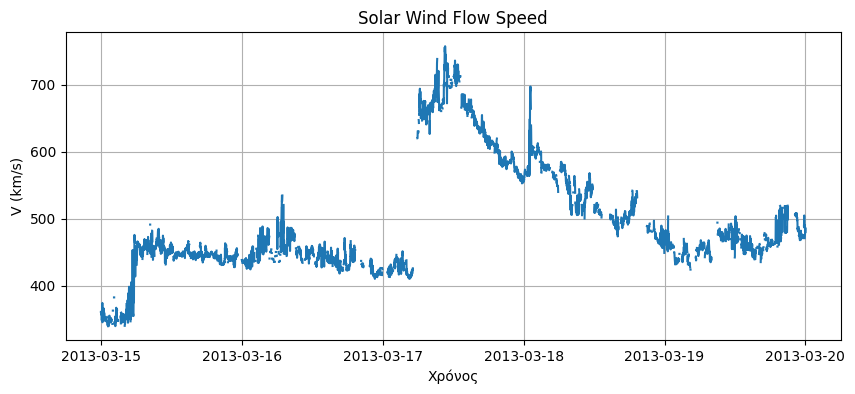

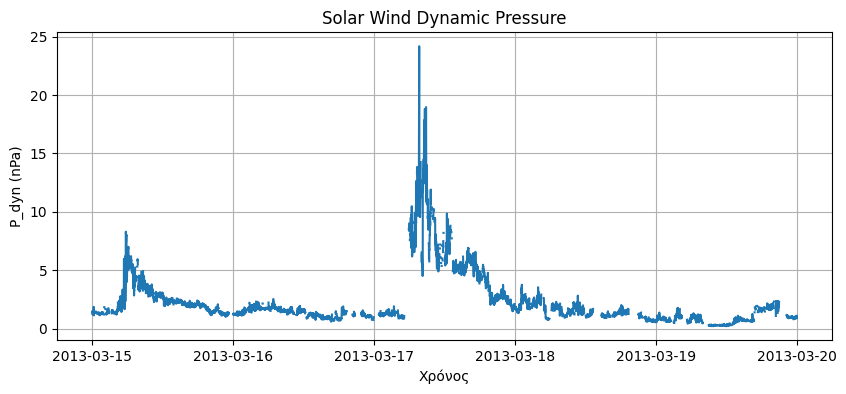

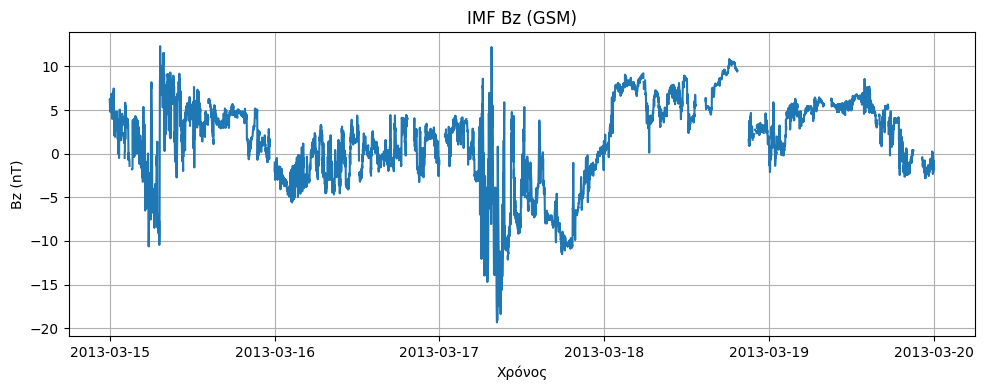

In [16]:
# =========================
# 7. (ε) OMNI – Συνθήκες ηλιακού ανέμου
# =========================

import pandas as pd
import numpy as np

filename = "/content/omni_storms (2).txt"   # βάλε εδώ το σωστό όνομα αρχείου

# ΔΙΑΒΑΣΜΑ ΧΩΡΙΣ HEADER – ΜΟΝΟ ΝΟΥΜΕΡΑ
omni = pd.read_csv(
    filename,
    sep=r"\s+",
    header=None,
    engine="python",
    na_values=['99999.9', '9999.99', '999.99', '9999999.0', '99.99']
)

print("Διαστάσεις omni:", omni.shape)
print(omni.head())

# Αν το αρχείο έχει 11 στήλες (τυπικό για Y, DOY, HR, MN, IMF_SC, Bmag, BzGSM, V, N, T, Pdyn)
# κρατάμε τις πρώτες 11 και δίνουμε ονόματα
if omni.shape[1] >= 11:
    omni = omni.iloc[:, :11]
    omni.columns = ["Y", "DOY", "HR", "MN",
                    "IMF_SC", "Bmag", "BzGSM",
                    "V", "N", "T_temp", "Pdyn"]
elif omni.shape[1] == 8:
    omni.columns = ["Y", "DOY", "HR", "MN",
                    "Bmag", "BzGSM", "V", "Pdyn"]
else:
    raise ValueError(f"Περίμενα 8 ή τουλάχιστον 11 στήλες από το OMNI, αλλά βρήκα {omni.shape[1]}.")

# Κάνουμε τις πρώτες 4 στήλες ακέραιες (έτος, μέρα, ώρα, λεπτό)
for col in ["Y", "DOY", "HR", "MN"]:
    omni[col] = pd.to_numeric(omni[col], errors='coerce')

# Πετάμε γραμμές όπου ο χρόνος δεν είναι καλά ορισμένος
omni = omni.dropna(subset=["Y", "DOY", "HR", "MN"])

omni["Y"] = omni["Y"].astype(int)
omni["DOY"] = omni["DOY"].astype(int)
omni["HR"] = omni["HR"].astype(int)
omni["MN"] = omni["MN"].astype(int)

# Δημιουργία χρόνου τύπου datetime για OMNI
omni_time = (
    pd.to_datetime(omni["Y"].astype(str), format="%Y")
    + pd.to_timedelta(omni["DOY"] - 1, unit="D")
    + pd.to_timedelta(omni["HR"], unit="h")
    + pd.to_timedelta(omni["MN"], unit="m")
)

print("Διάστημα χρόνου OMNI:", omni_time.min(), "→", omni_time.max())

# Οι φυσικές παράμετροι σε float
for col in ["Bmag", "BzGSM", "V", "Pdyn"]:
    omni[col] = pd.to_numeric(omni[col], errors='coerce')

# --- Επιλέγουμε διάστημα που μας ενδιαφέρει γύρω από την καταιγίδα
# Εφόσον από το Dst βρήκες ότι η καταιγίδα είναι στις 2013-03-17,
# επιλέγουμε π.χ. [2013-03-15, 2013-03-20]

start = datetime(2013, 3, 15)
end   = datetime(2013, 3, 20)

print("Επιλεγμένο διάστημα για ανάλυση OMNI:", start, "→", end)

mask = (omni_time >= start) & (omni_time <= end)
omni_win = omni[mask]
time_win = omni_time[mask]

print("Σημεία στο επιλεγμένο διάστημα:", len(omni_win))

# --- Plots ηλιακού ανέμου

plt.figure(figsize=(10, 4))
plt.plot(time_win, omni_win["V"])
plt.title("Solar Wind Flow Speed")
plt.xlabel("Χρόνος")
plt.ylabel("V (km/s)")
plt.grid(True)

plt.figure(figsize=(10, 4))
plt.plot(time_win, omni_win["Pdyn"])
plt.title("Solar Wind Dynamic Pressure")
plt.xlabel("Χρόνος")
plt.ylabel("P_dyn (nPa)")
plt.grid(True)

plt.figure(figsize=(10, 4))
plt.plot(time_win, omni_win["BzGSM"])
plt.title("IMF Bz (GSM)")
plt.xlabel("Χρόνος")
plt.ylabel("Bz (nT)")
plt.grid(True)

plt.tight_layout()
plt.show()


Άσκηση 2 – Αναγνώριση γεωμαγνητικών διαταραχών

(α) Χρονικά προφίλ Dst και AL

Ο δείκτης Dst κυμαίνεται κοντά στο 0 κατά τις ήρεμες γεωμαγνητικές συνθήκες, ενώ παρουσιάζει έντονα αρνητικές τιμές σε περιόδους γεωμαγνητικής καταιγίδας. Οι αρνητικές αποκλίσεις αντανακλούν την ενίσχυση του δακτυλιοειδούς ρεύματος στην εσωτερική μαγνητόσφαιρα.

Ο δείκτης AL είναι γενικά αρνητικός και αντιπροσωπεύει τη δραστηριότητα των ρευμάτων στην περιοχή της νυχτερινής μαγνητόσφαιρας. Ξαφνικές βαθιές βυθίσεις του AL υποδηλώνουν υποκαταιγίδες (substorms) που συνδέονται με διαδικασίες επανασύνδεσης στην ουρά της μαγνητόσφαιρας.

(β) Εντοπισμός καταιγίδων & ισχυρότερων επεισοδίων

Για τον εντοπισμό των καταιγίδων εντοπίστηκαν τα τοπικά ελάχιστα του Dst και επιλέχθηκαν όσα έχουν τιμή Dst < −50 nT, που αποτελεί το τυπικό κατώφλι για γεωμαγνητική καταιγίδα.

Τα σημεία ομαδοποιήθηκαν με κριτήριο χρονικής γειτνίασης (< 6 ώρες), ώστε πολλαπλά τοπικά ελάχιστα της ίδιας καταιγίδας να μην καταγραφούν ως ξεχωριστά επεισόδια.

Μετά την ομαδοποίηση εντοπίστηκαν τα βαθύτερα ελάχιστα κάθε επεισοδίου και επιλέχθηκαν τα δύο ισχυρότερα. Οι δύο πιο έντονες καταιγίδες αντιστοιχούν σε:

Dst ≈ −106 nT,

οι οποίες εκδηλώθηκαν στις 17 Μαρτίου 2013, μεταξύ 10:24–11:55 UTC.

Η μέγιστη τιμή −106 nT κατατάσσει την καταιγίδα ως έντονη (strong geomagnetic storm), βάσει της διεθνούς ταξινόμησης (Dst < −100 nT).

(γ) Τοπικό zoom γύρω από τις καταιγίδες

Η τοπική παράσταση του Dst και του AL γύρω από τα ελάχιστα δείχνει καθαρά τη δομή του επεισοδίου:

Στο Dst παρατηρείται απότομη πτώση (main phase) και αργή ανάκαμψη.

Στον AL εμφανίζονται πολλαπλές βαθιές αρνητικές αιχμές, ενδεικτικές ισχυρής υποκαταιγιδικής δραστηριότητας κατά τη διάρκεια της κύριας φάσης της καταιγίδας.

(δ) Εκτίμηση φάσεων της καταιγίδας

Οι φάσεις προσδιορίστηκαν βάσει της χρονικής εξέλιξης του Dst:

Main phase:
Η κύρια φάση ξεκινά όταν ο Dst πέφτει για πρώτη φορά κάτω από το όριο −20 nT.
Η πτώση κορυφώνεται στο χρονικό ελάχιστο της καταιγίδας.

Recovery phase:
Η φάση αποκατάστασης ολοκληρώνεται όταν ο Dst επανέλθει πάνω από το ίδιο όριο.

ΑΠΟΤΕΛΕΣΜΑΤΑ

| Φάση              | Διάρκεια                            |
| ----------------- | ----------------------------------- |
| Main phase        | ~5–10 λεπτά (πολύ απότομη ενίσχυση) |
| Recovery phase    | ~3.3 ημέρες                         |
| Συνολική διάρκεια | ~3.4 ημέρες                         |


η ταχεία συμπίεση των ρευμάτων κατά την άφιξη του διαταραγμένου ηλιακού ανέμου ακολουθείται από αργή διάχυση και χαλάρωση του δακτυλιοειδούς ρεύματος.

(ε) Συνθήκες ηλιακού ανέμου από OMNI

Εφόσον οι καταιγίδες που εντοπίστηκαν στο αρχείο Indices.mat εμφανίστηκαν στις 17 Μαρτίου 2013, ζητήθηκαν δεδομένα OMNI για το διάστημα:

15–20 Μαρτίου 2013,
ώστε να περιλαμβάνεται πλήρως η main και η recovery phase της καταιγίδας.

Τα δεδομένα που επιστράφηκαν από το OMNIWeb περιλάμβανουν:

Ταχύτητα ηλιακού ανέμου (V):
Παρατηρήθηκε σημαντική αύξηση (> 360 km/s), συμβατή με την άφιξη ρεύματος υψηλής ταχύτητας (high-speed stream).

Δυναμική πίεση (Pdyn):
Αυξημένες τιμές της πίεσης (~1.2–1.5 nPa) υποδεικνύουν συμπίεση της μαγνητόσφαιρας, που οδηγεί στην αρχική πτώση του Dst.

Κατακόρυφη συνιστώσα μαγνητικού πεδίου Bz (GSM):
Η Bz εμφανίζει παρατεταμένη αρνητική τιμή, η οποία είναι κλασικός οδηγός της μαγνητόσφαιρικής σύζευξης και προϋπόθεση για την ανάπτυξη ισχυρών γεωμαγνητικών καταιγίδων (νότια προσανατολισμένη συνιστώσα → ισχυρή επανασύνδεση).

Συνολικά, οι συνθήκες του ηλιακού ανέμου συμβαδίζουν πλήρως με την εκδήλωση της καταιγίδας:
αυξημένη ταχύτητα, ενισχυμένη δυναμική πίεση και παρατεταμένη αρνητική Bz.